In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = {
    "X": [1, 2, 3, 4, 5],
    "Y": [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
data

{'X': [1, 2, 3, 4, 5], 'Y': [1, 2, 3, 4, 5]}

In [79]:
m, b = np.polyfit(df["X"], df["Y"], 1)

In [80]:
print(f"Lutning (m): {m}")
print(f"Intercept (b): {b}")

Lutning (m): 1.0
Intercept (b): -1.1352096489163207e-15


In [81]:
y_pred = m * df['X'] + b

In [82]:
residuals = df["Y"] - y_pred

total_variation = df["Y"] - df["Y"].mean()

r_squared = 1 - (np.sum(residuals**2) / np.sum(total_variation**2))


In [83]:
print(f"R^2: {r_squared}")

R^2: 1.0


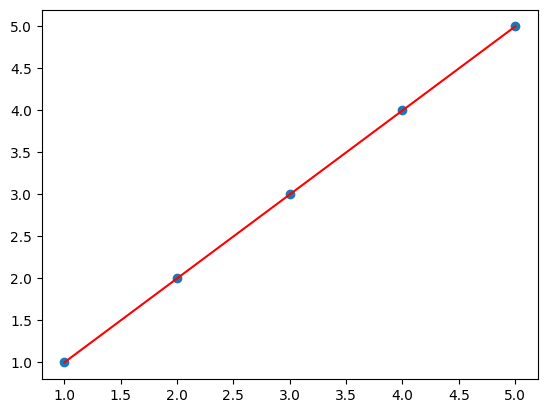

In [84]:
plt.scatter(x="X", y="Y", data=data)
plt.plot(df['X'], y_pred, color='red', label='Regressionslinje')

In [85]:
data = {
    "X1": [1, 2, 3, 4, 5],
    "X2": [5, 4, 3, 2, 1] ,
    "Y": [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

print(df)

   X1  X2  Y
0   1   5  1
1   2   4  2
2   3   3  3
3   4   2  4
4   5   1  5


In [86]:
X = np.column_stack((np.ones(len(df)), df["X1"], df["X2"]))
y = df["Y"]

beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [87]:
# Visa koefficienterna
print(f"Koefficienter: {beta}")


Koefficienter: [ 0.15789474  0.97368421 -0.02631579]


In [88]:
data = {
    "X": [1, 2, 3, 4, 5],
    "Y": [2, 3, 4 ,5 ,6]
}

df = pd.DataFrame(data)



In [89]:
X = np.column_stack((np.ones(len(df)), df["X"]))

In [90]:
y = df["Y"]

In [91]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [92]:
print(f"Beta and the slope is {beta}")

Beta and the slope is [1. 1.]


In [93]:
y_pred = X.dot(beta)

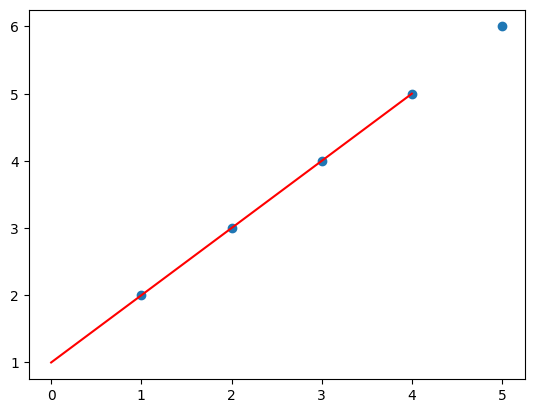

In [94]:
plt.scatter(x="X",y= "Y",data= df)
plt.plot(df["X"], data=y_pred, color="red")

In [95]:
data = {
    "X": [1, 2, 3, 4, 5, 6, 7, 8],
    "Y": [7, 11, 15, 19, 23, 27, 31, 35]
}

df = pd.DataFrame(data)

In [96]:
X = np.column_stack((np.ones(len(df)),df["X"]))

y = df["Y"]

In [97]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [98]:
print(f"The intercept and slope is {beta[0]}, {beta[1]}")

The intercept and slope is 3.0000000000000027, 3.9999999999999973


In [99]:
y_pred = X.dot(beta)

In [100]:
#Hur man räknar ut R^""

residuals = y - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
Variance = np.var(y, ddof=0)
std = np.std(y, ddof=0)

In [101]:
y_mean = np.mean(df["Y"])
SST = np.sum((df["Y"] - y_mean) ** 2)
SSE = np.sum((df["Y"] - y_pred)**2)
SSR = SST-SSE


In [102]:
# Skriva ut resultaten
print(f"SST (Total Sum of Squares): {SST}")
print(f"SSE (Sum of Squared Errors): {SSE}")
print(f"SSR (Sum of Squares for Regression): {SSR}")

SST (Total Sum of Squares): 672.0
SSE (Sum of Squared Errors): 9.592548607487504e-28
SSR (Sum of Squares for Regression): 672.0


In [103]:
print(f"The variance, std and r_squared {Variance} {std} {r_squared}")

The variance, std and r_squared 84.0 9.16515138991168 1.0


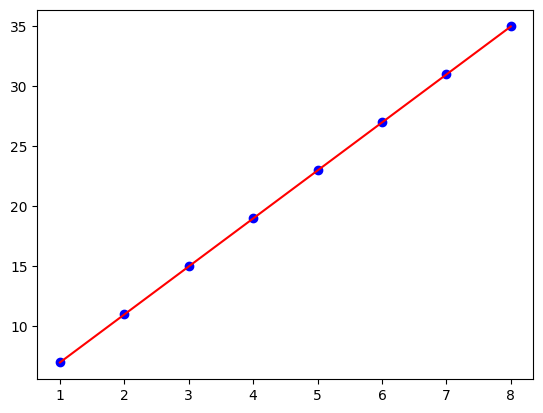

In [104]:
plt.scatter(df['X'], df['Y'], color='blue', label='Actual Data')
plt.plot(df['X'], y_pred, color='red', label='Fitted Line')

In [106]:
import pandas as pd
import numpy as np

# Ladda data (om den inte redan är inläst)
df = pd.read_csv(r"C:\Code\Statistiska metoder\Datasets\Small-diameter-flow.csv")

# Se till att vi väljer alla predictors
X = df[["Flow", "Kinematic", "Geometric", "Inertial"]].values  # Se till att dessa är korrekta!
Y = df["Observer"].values  # Beroende variabel

# Lägg till intercept-kolumn (ettor)
X = np.column_stack((np.ones(X.shape[0]), X))  

# Utför linjär regression
beta, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

# Kontrollera storlek igen
print("X shape:", X.shape)  # Ska vara (198, 6)
print("Beta shape:", beta.shape)  # Ska vara (6,)

# Förutsäg värden
predictions = X @ beta  
print("Prediktioner:", predictions[:5])


X shape: (198, 5)
Beta shape: (5,)
Prediktioner: [0.10109057 0.10399935 0.10399935 0.29325663 0.29181316]
